# **Breast Cancer Classification using ANN**

## **1. Problem Statement : Develop an ANN model to predict if the tumor is Malignant (0) OR Benign (1)**

## **2. Importing the Libraries**

In [1]:
#=================================================================
# For data manipulation, plotting, and miscellaneous
#=================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import calendar
from datetime import datetime

#=================================================================
# From sklearn import required classes
#=================================================================
import sklearn
import sklearn.datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#========================================================================
# Import Keras models, layers, activation functions
#========================================================================
import tensorflow as tf
tf.random.set_seed(3) # useful when we are running the code multiple time, and building an accurate model and comparing the accuracy during training
import keras
from keras import datasets,models
from keras.models import Sequential
from keras.layers import Dense, ReLU, LeakyReLU, Dropout, BatchNormalization
from keras import regularizers
from keras import optimizers
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping


## **3. Load the Dataset and Perform Visualization**

In [2]:
# Load the Dataset from sklearn
df0 = sklearn.datasets.load_breast_cancer()

In [3]:
print(type(df0))
print(df0)

<class 'sklearn.utils._bunch.Bunch'>
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 

In [4]:
df0.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
df0.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
# Loading the Data to a Dataframe

df = pd.DataFrame(data=df0.data, columns=df0.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.shape

(569, 30)

In [8]:
# adding the "target" column to the data frame
df['target']=df0.target

In [9]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [10]:
# get the information about Ddataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Data is stored in "int" and "float" datatypes (that means no categorical data)

In [11]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

No Null values present in the dataset

In [12]:
# Statistical measures of the data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
# Check the distribution of Target variable (how many samples belongs top which category)
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

**0 - Malignant**

**1 - Benign**

In [14]:
df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### **3.1. Separating the Data in to X and Y**

In [15]:
X = df.drop(columns=['target'], axis=1)
Y = df['target']

In [16]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [18]:
Y.value_counts()

1    357
0    212
Name: target, dtype: int64

### **3.2. Splitting the data into Training data & Testing data**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape )

(455, 30) (455,) (114, 30) (114,)


In [21]:
type(y_test)

pandas.core.series.Series

### **3.3. Standardize the data**

**Since we don't know the lower and upper bounds for each feature in the dataset, hence we are using Standardscaler instead of MinMaxScaler**


In [22]:
scaler = StandardScaler()

# Fit the Scaler to the Train dataset, it will learn the parameters like mean, standard deviation
#scaler.fit(x_train)

# then transform train and test data sets

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# This transformation process takes the dataframe as input but outputs as numpy array

In [23]:
x_train

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [24]:
x_test

array([[-0.04462793, -1.41612656, -0.05903514, ..., -0.18278004,
        -1.23064515, -0.6268286 ],
       [ 0.24583601, -0.06219797,  0.21802678, ...,  0.54129749,
         0.11047691,  0.0483572 ],
       [-1.26115925, -0.29051645, -1.26499659, ..., -1.35138617,
         0.269338  , -0.28231213],
       ...,
       [ 0.72709489,  0.45836817,  0.75277276, ...,  1.46701686,
         1.19909344,  0.65319961],
       [ 0.25437907,  1.33054477,  0.15659489, ..., -1.29043534,
        -2.22561725, -1.59557344],
       [ 0.84100232, -0.06676434,  0.8929529 , ...,  2.15137705,
         0.35629355,  0.37459546]])

## **4. Neural Network Model**

### **4.1. Create the Model**

In [25]:
model = Sequential()

input_shape1 = (30,)   # number of X_columns (parameters)

model.add(Dense(32, activation='relu', input_shape =input_shape1))
model.add(Dense(2,activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,058
Trainable params: 1,058
Non-trainable params: 0
_________________________________________________________________


### **4.2. Compile the Model**

In [27]:
# since the 'target' column is not One-Hot encoded, hence we are using "sparse_categorical_crossentroy". 
#  if it is One-Hot encoded, then we need to use "categorical_crossentroy"
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### **4.3. Fit the Model**

In [28]:
history = model.fit(x_train,y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 13ms/step - loss: 0.5130 - accuracy: 0.7873 - val_loss: 0.3128 - val_accuracy: 0.9348
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3256 - accuracy: 0.8973 - val_loss: 0.2131 - val_accuracy: 0.9565
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2359 - accuracy: 0.9364 - val_loss: 0.1692 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1926 - accuracy: 0.9413 - val_loss: 0.1453 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1641 - accuracy: 0.9511 - val_loss: 0.1312 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1463 - accuracy: 0.9584 - val_loss: 0.1212 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1328 - accuracy: 0.9633 - val_loss: 0.1138 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

### **4.4. Save the Trained NN model**

In [29]:
model.save("DL_Breast_Cancer_Classification_ANN_Trained_Model.h5")

### **4.5. Plot the Accuracy and Loss history**

Text(0.5, 0, 'epoch no.')

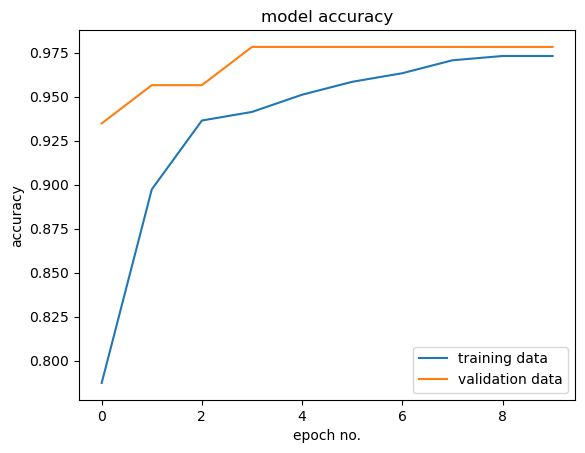

In [30]:
plt.plot(history.history['accuracy'] , label='training data')
plt.plot(history.history['val_accuracy'], label='validation data')

plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch no.')

Text(0.5, 0, 'epoch no.')

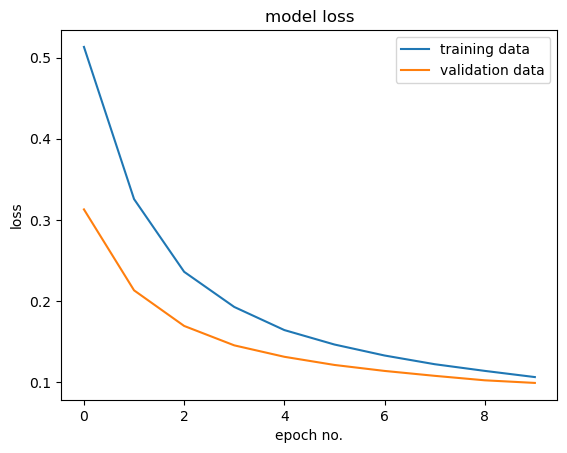

In [31]:
plt.plot(history.history['loss'] , label='training data')
plt.plot(history.history['val_loss'], label='validation data')

plt.legend()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch no.')

### **4.6. Accuracy of the Model on Test data**

In [32]:
loss, accuracy = model.evaluate(x_test,y_test)
print(accuracy)

4/4 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 0.9737
0.9736841917037964


### **4.7. Prediction for Test Dataset**

In [33]:
print(x_test.shape)

(114, 30)


In [34]:
print(x_test[0])

[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [35]:
#Predict on Test dataset

y_pred = model.predict(x_test)

4/4 [==============================] - 0s 0s/step


In [36]:
print(y_pred.shape)

(114, 2)


In [37]:
print(y_pred[0])

[0.14861168 0.8513883 ]


**model.predict() gives the prediction probability of each class for that data point**

**Working of np.argmax() funtion**

In [38]:
# np.argmax() function

list_1 = [10,20,30]

index_of_maxvalue = np.argmax(list_1)

print(list_1)
print(index_of_maxvalue)

[10, 20, 30]
2


In [39]:
list_1 = [0.67350805, 0.6158984]
index_of_maxvalue = np.argmax(list_1)

print(list_1)
print(index_of_maxvalue)

[0.67350805, 0.6158984]
0


### **4.8. Converting the prediction probability to class labels**

In [40]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [41]:
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


### **4.9. Building the predictive system**

In [42]:
x_test[0]

array([-0.04462793, -1.41612656, -0.05903514, -0.16234067,  2.0202457 ,
       -0.11323672,  0.18500609,  0.47102419,  0.63336386,  0.26335737,
        0.53209124,  2.62763999,  0.62351167,  0.11405261,  1.01246781,
        0.41126289,  0.63848593,  2.88971815, -0.41675911,  0.74270853,
       -0.32983699, -1.67435595, -0.36854552, -0.38767294,  0.32655007,
       -0.74858917, -0.54689089, -0.18278004, -1.23064515, -0.6268286 ])

In [43]:
type(x_test[0])

numpy.ndarray

In [44]:
x_test[0].shape

(30,)

In [45]:
input_data_as_numpy_array = x_test[0]
input_data_as_numpy_array.shape
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped.shape

(1, 30)

In [46]:
type(input_data_reshaped)

numpy.ndarray

In [47]:
y_test_array = y_test.to_numpy()

In [48]:
type(y_test_array)

numpy.ndarray

#### **4.9.1. Prediction**

In [49]:
test_sample_index = 12  # index value for which prediction will be made

In [50]:
#input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

## change the input_data to a numpy array
#input_data_as_numpy_array = np.asarray(input_data)

input_data_as_numpy_array = x_test[test_sample_index]
## reshape the numpy array as we are predicting for one data point
input_data_std = input_data_as_numpy_array.reshape(1,-1)

## standardizing the input data
#input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print("predicted probability : ", prediction)

prediction_label_list = [np.argmax(prediction)]  # finding the index of maximum probability value

prediction_label = prediction_label_list[0]
print("Predicted Label:", prediction_label)

if(prediction_label == 0.0):
  print('The tumor is Malignant')
else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 16ms/step
predicted probability :  [[0.11335156 0.8866484 ]]
Predicted Label: 1
The tumor is Benign


In [51]:
print("Actual Label:" , y_test_array[test_sample_index])
print("Predicted Label:", prediction_label )

Actual Label: 1
Predicted Label: 1


## **End of the Project**